In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import syft as sy

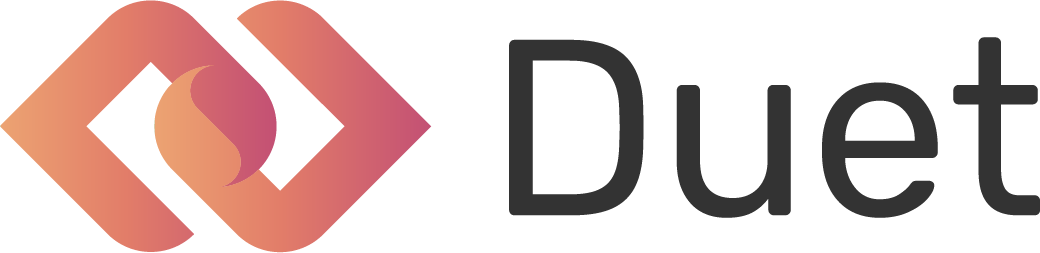

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!



In [2]:
duet = sy.duet(loopback=True)

In [3]:
def split_data(dataset, worker_list=None, n_workers=2):

    if worker_list is None:
        worker_list = list(range(0, n_workers))
            
    #counter to create the index of different data samples
    idx = 0 
    
    #dictionary to accomodate the split data
    dic_single_datasets = {}
    for worker in worker_list: 
        """
        Each value is a list of three elements, to accomodate, in order: 
        - data examples (as tensors)
        - label
        - index 
        """
        dic_single_datasets[worker] = [] 

    """
    Loop through the dataset to split the data and labels vertically across workers. 
    Splitting method from @abbas5253: https://github.com/abbas5253/SplitNN-for-Vertically-Partitioned-Data/blob/master/distribute_data.py
    """
    label_list = []
    index_list = []
    for tensor, label in dataset:
        height = tensor.shape[-1]//len(worker_list)
        i = 0
        for worker in worker_list[:-1]: 
            dic_single_datasets[worker].append(tensor[:, :, height * i : height * (i + 1)])
            i += 1
            
        #add the value of the last worker / split
        dic_single_datasets[worker_list[-1]].append(tensor[:, :, height * (i) : ])
        label_list.append(torch.Tensor([label]))
        index_list.append(torch.Tensor([idx]))
        
        idx += 1
        
    return dic_single_datasets, label_list, index_list

In [4]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('mnist', download=True, train=False, transform=transform)

In [5]:
img, _, _ = split_data(trainset)

In [6]:
img = torch.cat(img[0][:10_000])  # get the first split of the data

In [7]:
img_rshp = img.view(img.shape[0], -1)

In [8]:
print(img_rshp.shape)

torch.Size([10000, 392])


In [9]:
val_img, _, _ = split_data(valset)
val_img = torch.cat(val_img[0][:5_000])
val_img_rshp = val_img.view(val_img.shape[0], -1)
print(val_img_rshp.shape)

torch.Size([5000, 392])


In [10]:
img_rshp.send(duet, searchable=True, tags=["flatten"], description="flattened")
val_img_rshp.send(duet, searchable=True, tags=["flatten_val"], description="flattened validation data")

In [11]:
duet.requests.add_handler(action="accept", tags=[""])

[2021-03-22T10:02:13.601997+0000][CRITICAL][logger]][62303] You are not Authorized to access this service
[2021-03-22T10:02:13.602568+0000][CRITICAL][logger]][62303] You are not Authorized to access this service
[2021-03-22T10:02:13.602994+0000][CRITICAL][logger]][62303] You are not Authorized to access this service
Exception in callback AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55
handle: <Handle AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55>
Traceback (most recent call last):
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/nest_asyncio.py", line 199, in run
    ctx.run(self._callback, *self._args)
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py", line 62, in _callback
   

[2021-03-22T10:08:02.299454+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 75532c3858c24178884d072511d38220>.
[2021-03-22T10:08:04.575688+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4b2e2645ecc44828beae7d8aa6bd2bff>.
[2021-03-22T10:08:06.861938+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 368dbbcd9c6742a18e37d3cceac58613>.
[2021-03-22T10:08:08.165585+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0f308f33c28849bbb21f63c129011466>.
[2021-03-22T10:08:10.451325+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f25f9bd5b8cb42bd8401c7f4ad1df6fa>.
[2021-03-22T10:08:10.757742+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 59c9dde87fbb44d

[2021-03-22T10:09:36.686056+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1e60a366eabf474196d58c50d8da4574>.
[2021-03-22T10:09:37.976392+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e6ba1842dabd4f5eafeaff66a4abaef4>.
[2021-03-22T10:09:40.245320+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c4c28c490bae43c4ae37e11be4cf5f25>.
[2021-03-22T10:09:42.528837+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 77696032e5ea44f3b4e8326ddf6fc4c3>.
[2021-03-22T10:09:47.044134+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1c0ed4e4a8254bca9a57d11fab59d990>.
[2021-03-22T10:09:49.311158+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c206ab5e21a5466

[2021-03-22T10:11:19.789732+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 080d150569b04672a2d50dea3d180648>.
[2021-03-22T10:11:22.084854+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f0794778b3de486bb662863af1fe1711>.
[2021-03-22T10:11:24.384963+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4004f22fcf1c4e02812371694c9f38e3>.
[2021-03-22T10:11:24.703462+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: fc41485d7fd04273980a5c9b7b06561a>.
[2021-03-22T10:11:26.995728+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a8bc28fb785643b297cf2fad786ecda9>.
[2021-03-22T10:11:29.295830+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6a84c8d98b664e8

[2021-03-22T10:12:57.661389+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 428118c2dc5f4ee0b5ec5869e46325d7>.
[2021-03-22T10:12:59.962203+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: a4c75469ba394bdc9e19afc0c28e1ee4>.
[2021-03-22T10:13:02.284370+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 290fbe260ab3433095e6bdd444a8a47e>.
[2021-03-22T10:13:04.581040+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f2a5f6a09cab48d18daed235d88cf58c>.
[2021-03-22T10:13:06.909674+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 56ed4ea09c034488900e8a4eb049b22a>.
[2021-03-22T10:13:09.213095+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: beda59a641cb4a1

[2021-03-22T10:14:42.867770+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e8dc1d637aba4db3966cce7ac2519463>.
[2021-03-22T10:14:45.142598+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2000135c89474a0bb86b43cdc82a8909>.
[2021-03-22T10:14:47.411717+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 97b9c2acd7df4e1784f94d81c3e33d2b>.
[2021-03-22T10:14:49.681225+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 0cadda4ed7ca48539d1a3ef3d2a19172>.
[2021-03-22T10:14:51.951335+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9c23f18802ab4e20811912605dce5fe7>.
[2021-03-22T10:14:53.226959+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ea4f29ce983f4e5

[2021-03-22T10:16:20.095552+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d4ee9a3e33944cc5bd51b9bd3662c385>.
[2021-03-22T10:16:21.371996+0000][CRITICAL][logger]][62303] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d16cc6a96ad3498b8e225789e47a59ae>.
